## Import essential libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import data as data
import seaborn
import re
%matplotlib inline

## Allow Jupyter to render all columns (for longer dataframes)

In [2]:
# Show all columns
pd.set_option('display.max_columns', None)

## Read in data utilizing the method "usecols" to snipe specific columns

In [3]:
# respondent = []
respondent = pd.read_csv('data/atusresp_2014.dat', sep=',')


roster_list = [0, 1, 2, 3, 4]
roster = pd.read_csv('data/atusrost_2014.dat', sep=',', usecols=roster_list)


activity_list = [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22]
activity = pd.read_csv('data/atusact_2014.dat', sep=',', usecols=activity_list)


who_list = [0, 1, 3, 4]
who = pd.read_csv('data/atuswho_2014.dat', sep=',', usecols=who_list)


elder_list = [0, 1, 2, 3, 4, 5, 6, 7]
elder = pd.read_csv('data/atusrostec_2014.dat', sep=',', usecols=elder_list)


hours_list = [128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]
hours = pd.read_csv('data/atussum_2014.dat', sep=',', usecols=hours_list)

work_list = [0, 2, 3, 4, 5]
work = pd.read_csv('data/atussum_2014.dat', sep=',', usecols=work_list)


summary = pd.read_csv('data/atussum_2014.dat', sep=',')




In [4]:
#respondent

#roster
#Household ID, family member, age, relationship, sex

#activity
#Household ID, activity, time spend 

#who
#household ID, activity number, 

#elder

#summary


## Find total hours worked, copy series, and add to main data frame for comparison. 

In [5]:
hours['Total_Work'] = hours.sum(axis=1)

In [6]:
hours_copy = hours['Total_Work'].copy()

In [7]:
work['Total _Work'] = hours_copy

In [13]:
#Show sample of updated dataframe
work

,tucaseid,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,Total _Work
0,20140101140007,0,20,2,39,0
1,20140101140011,16,16,2,37,465
2,20140101140028,2,65,2,38,0
3,20140101140063,-1,50,2,39,0
4,20140101140168,8,23,2,39,60
5,20140101140537,-1,85,1,36,0
6,20140101140559,1,27,1,43,645
7,20140101140610,0,28,1,42,555
8,20140101140614,-1,63,2,40,0
9,20140101140639,-1,85,1,44,0


## The average age was 48.

In [10]:
work['TEAGE'].mean()

48.797187715665977

## Creation function to change "1, 2" values in column to "Male, Female"

In [14]:
#Create function to change TESEX values
def sex_changes(value):
    for sex in value:
        if sex == '1':
            return "Male"
        if sex == '2':
            return "Female"

## Change values in TESEX column from "int" to "str" to ensure proper iteration.

In [15]:
roster.TESEX = roster.TESEX.astype(str)

## Run function to implement aforementioned changes.

In [16]:
roster.TESEX = roster.TESEX.apply(lambda x: sex_changes(x))

## Create series to graph quantities of male and females.

In [18]:
sex_count = roster['TESEX']

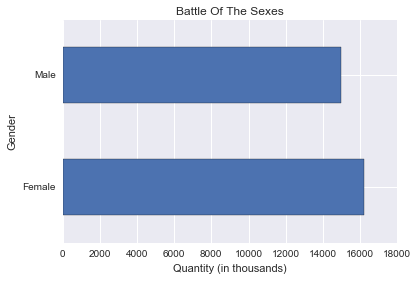

In [19]:
plt.xlabel('Quantity (in thousands)')
plt.ylabel('Gender')
sex_count.value_counts().plot.barh(title="Battle Of The Sexes")